#0. Importing Libraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix, heatmap

# 1. Prepare Data


## 1.1 Reading Data

In [2]:
df = pd.read_excel("/content/UHPGC 12-09-2023.xlsx")
df.head()

,Unnamed: 0,GGBS,SF,FA,RHA,Fine aggregate,NaOH,Na2SiO3,KOH,NaOH/Na2SiO3 ratio,KOH/Na2SiO3 ratio,extra water,curing temperture,SP,Steel fiber,L/binder ratio,Flowability (mm),CS,Unnamed: 18
0,1,688.0,45.0,167.0,0.0,905.0,28.5,306.6,0.0,0.092955,0.0,117.1,25.0,0.0,157.0,0.502444,135.0,152.5,https://doi.org/10.1016/j.conbuildmat.2023.131988
1,2,688.0,0.0,172.0,45.0,905.0,28.5,306.6,0.0,0.092955,0.0,NaN,25.0,0.0,0.0,0.389651,NaN,105.0,http://dx.doi.org/10.1016/j.scitotenv.2023.165090
2,3,688.0,0.0,172.0,45.0,905.0,28.5,306.6,0.0,0.092955,0.0,NaN,25.0,0.0,78.0,0.389651,NaN,120.0,NaN
3,4,688.0,0.0,172.0,45.0,905.0,28.5,306.6,0.0,0.092955,0.0,NaN,25.0,0.0,156.0,0.389651,NaN,140.0,NaN
4,5,688.0,0.0,172.0,45.0,905.0,28.5,306.6,0.0,0.092955,0.0,NaN,25.0,0.0,234.0,0.389651,NaN,146.5,NaN


## 1.2 Drop Unused Columns and Rows

In [3]:
df = df[['GGBS', 'SF', 'FA', 'RHA', 'Fine aggregate', 'NaOH',
       'Na2SiO3  ', 'KOH', 'NaOH/Na2SiO3 ratio', 'KOH/Na2SiO3 ratio',
       'extra water', ' curing temperture', 'SP', 'Steel fiber',
       'L/binder ratio', 'Flowability (mm)', 'CS']]

In [4]:
df.head()

,GGBS,SF,FA,RHA,Fine aggregate,NaOH,Na2SiO3,KOH,NaOH/Na2SiO3 ratio,KOH/Na2SiO3 ratio,extra water,curing temperture,SP,Steel fiber,L/binder ratio,Flowability (mm),CS
0,688.0,45.0,167.0,0.0,905.0,28.5,306.6,0.0,0.092955,0.0,117.1,25.0,0.0,157.0,0.502444,135.0,152.5
1,688.0,0.0,172.0,45.0,905.0,28.5,306.6,0.0,0.092955,0.0,NaN,25.0,0.0,0.0,0.389651,NaN,105.0
2,688.0,0.0,172.0,45.0,905.0,28.5,306.6,0.0,0.092955,0.0,NaN,25.0,0.0,78.0,0.389651,NaN,120.0
3,688.0,0.0,172.0,45.0,905.0,28.5,306.6,0.0,0.092955,0.0,NaN,25.0,0.0,156.0,0.389651,NaN,140.0
4,688.0,0.0,172.0,45.0,905.0,28.5,306.6,0.0,0.092955,0.0,NaN,25.0,0.0,234.0,0.389651,NaN,146.5


In [5]:
df = df.iloc[:123,:]

## 1.3 Check for null Values

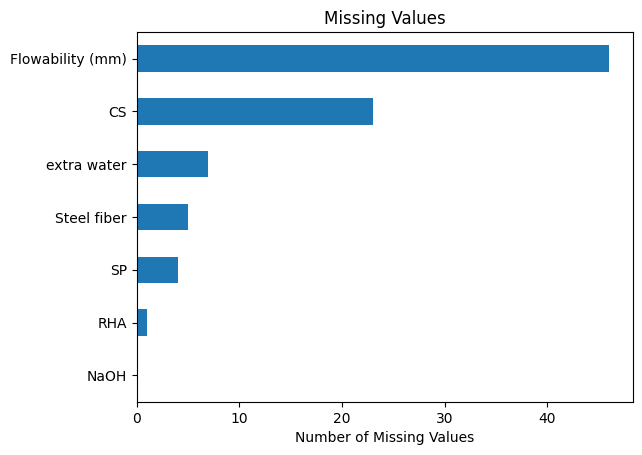

In [6]:
df.isna().sum().sort_values().tail(7).plot(kind="barh")
plt.title("Missing Values")
plt.xlabel("Number of Missing Values");

# 1.4 Drop Rows with missing Target

In [7]:
data = df.dropna(subset="CS", axis=0)

In [8]:
data.head()

,GGBS,SF,FA,RHA,Fine aggregate,NaOH,Na2SiO3,KOH,NaOH/Na2SiO3 ratio,KOH/Na2SiO3 ratio,extra water,curing temperture,SP,Steel fiber,L/binder ratio,Flowability (mm),CS
0,688.0,45.0,167.0,0.0,905.0,28.5,306.6,0.0,0.092955,0.0,117.1,25.0,0.0,157.0,0.502444,135.0,152.5
1,688.0,0.0,172.0,45.0,905.0,28.5,306.6,0.0,0.092955,0.0,NaN,25.0,0.0,0.0,0.389651,NaN,105.0
2,688.0,0.0,172.0,45.0,905.0,28.5,306.6,0.0,0.092955,0.0,NaN,25.0,0.0,78.0,0.389651,NaN,120.0
3,688.0,0.0,172.0,45.0,905.0,28.5,306.6,0.0,0.092955,0.0,NaN,25.0,0.0,156.0,0.389651,NaN,140.0
4,688.0,0.0,172.0,45.0,905.0,28.5,306.6,0.0,0.092955,0.0,NaN,25.0,0.0,234.0,0.389651,NaN,146.5


## 1.5 Separate Features and Target

In [331]:
X = data.drop(columns="CS")
y = data["CS"]

In [10]:
cols = ['GGBS', 'SF', 'FA', 'RHA', 'Fine aggregate', 'NaOH', 'Na2SiO3  ', 'KOH', 'extra water', 'SP', 'Steel fiber']

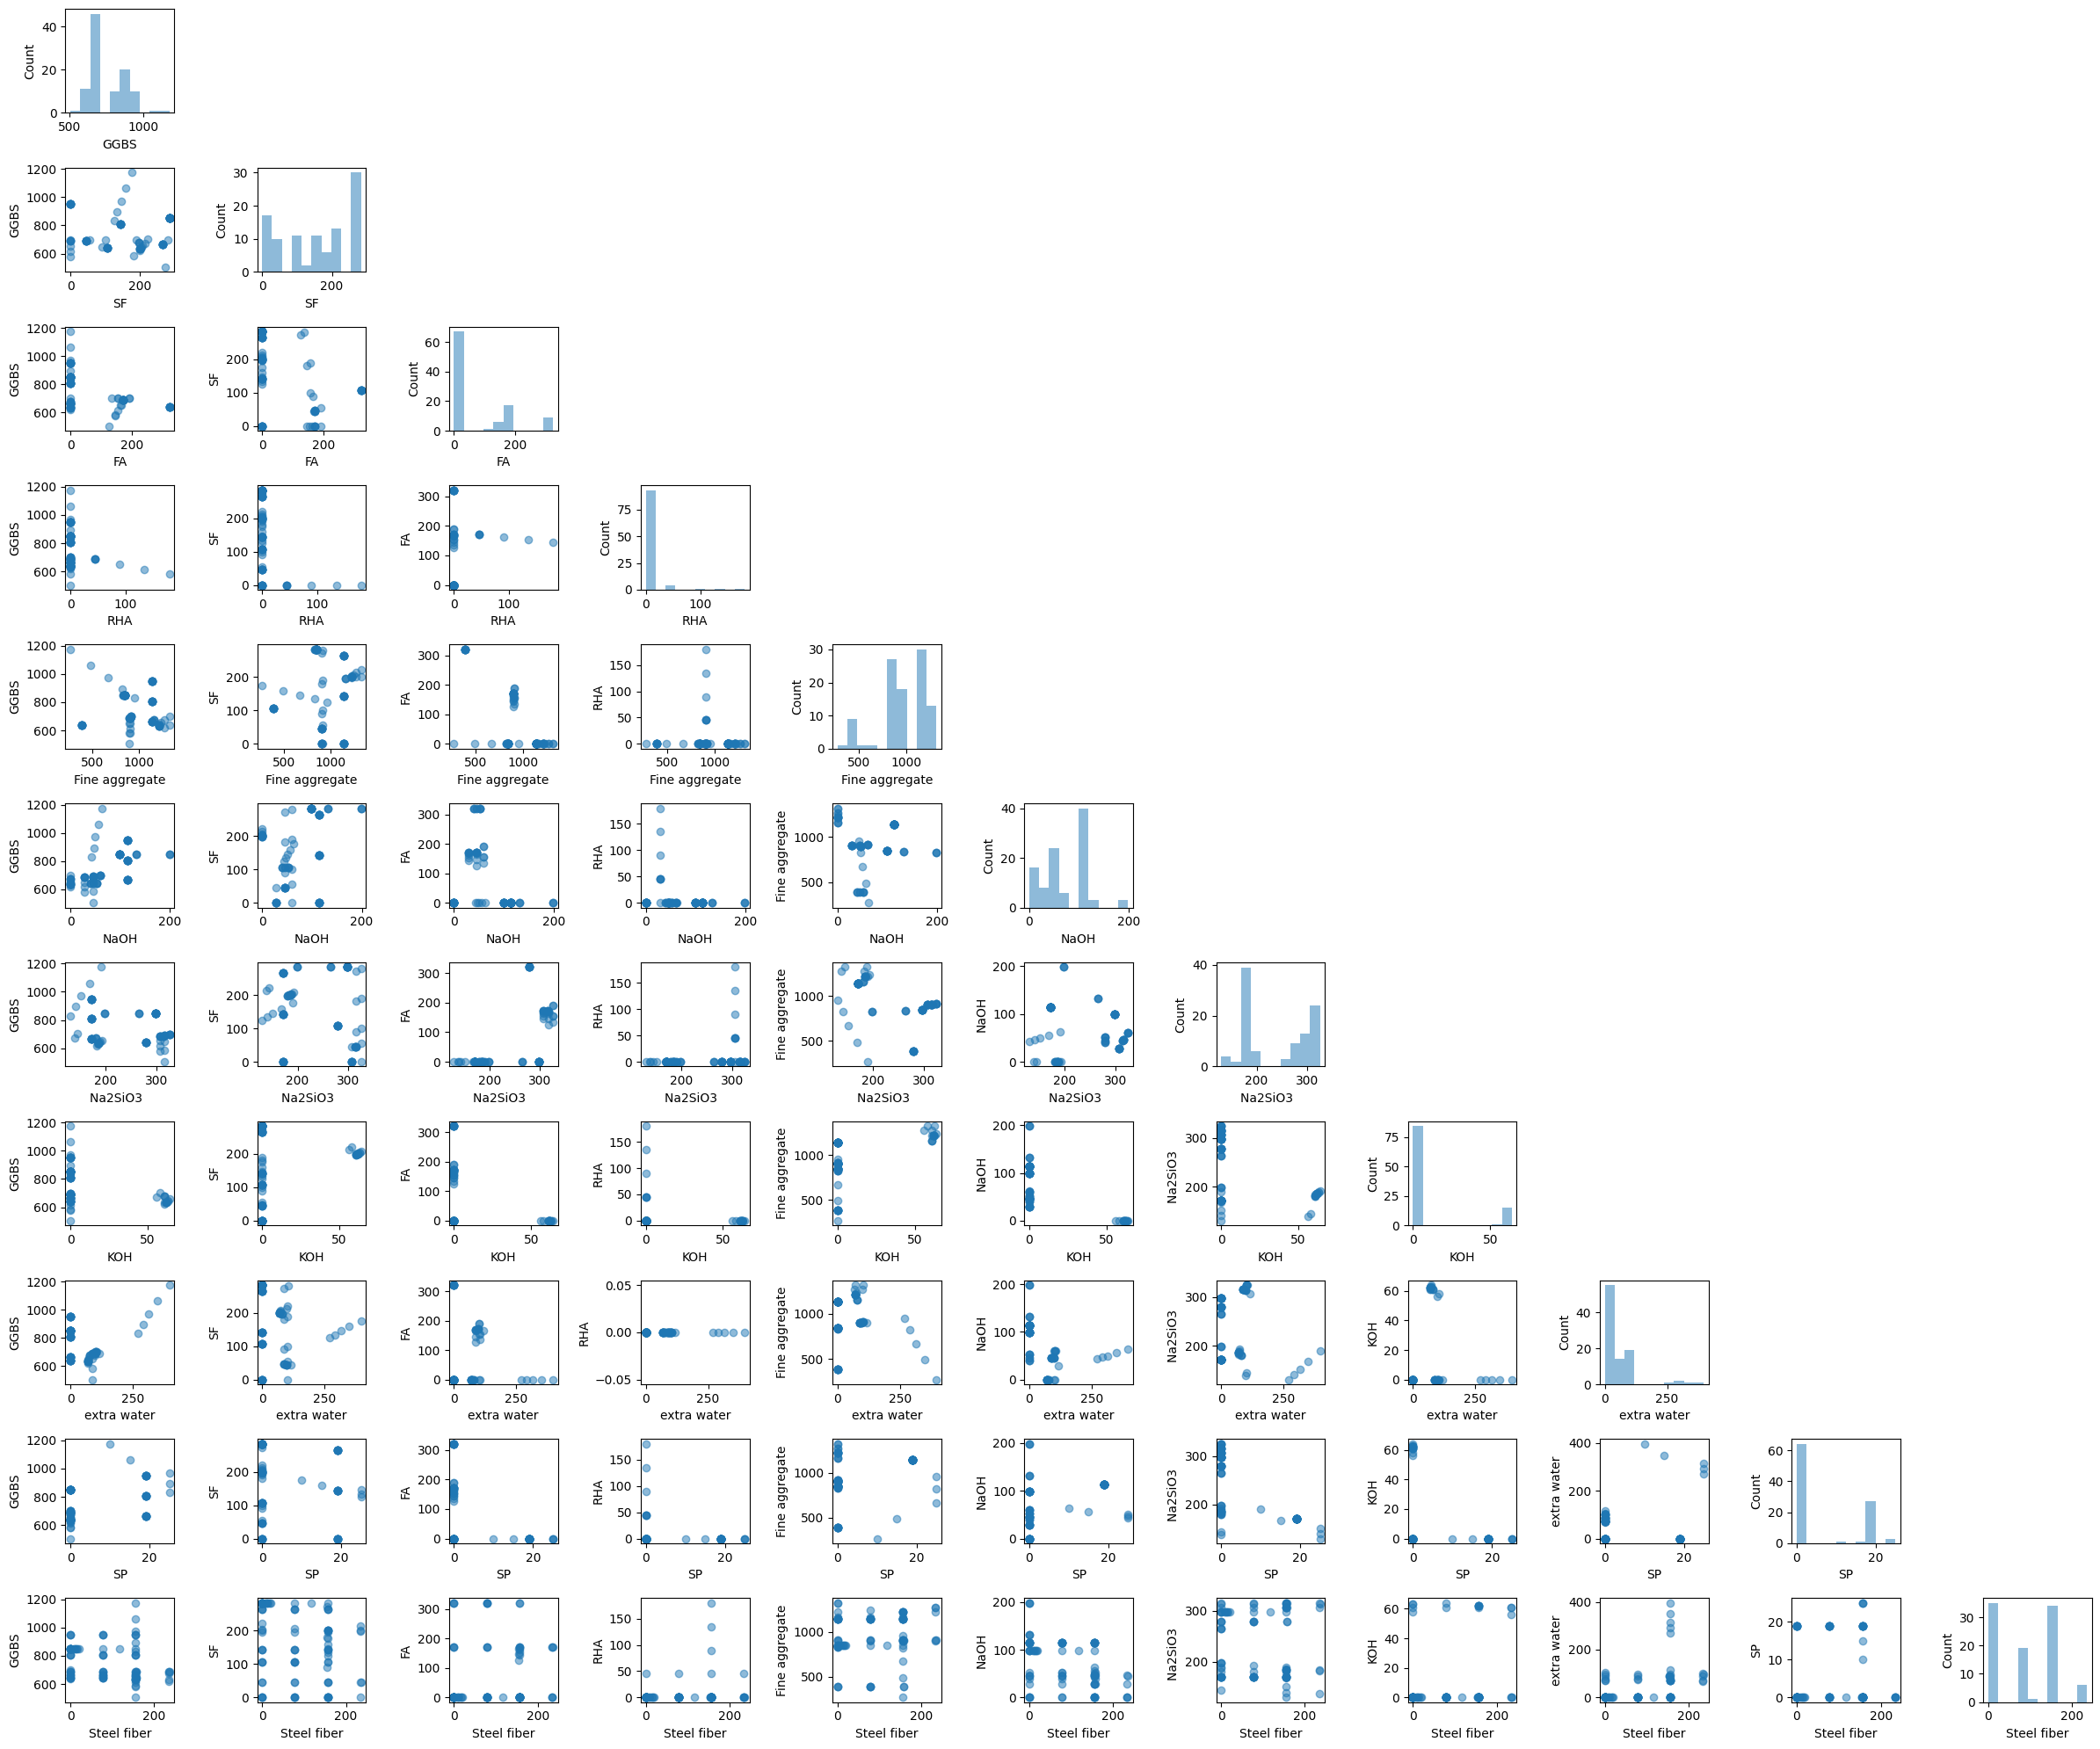

In [11]:
scatterplotmatrix(data[cols].values, figsize=(24, 20), names=data[cols].columns, alpha=0.5)
plt.tight_layout()
plt.savefig("/content/figures/distributionofmaterials.png")

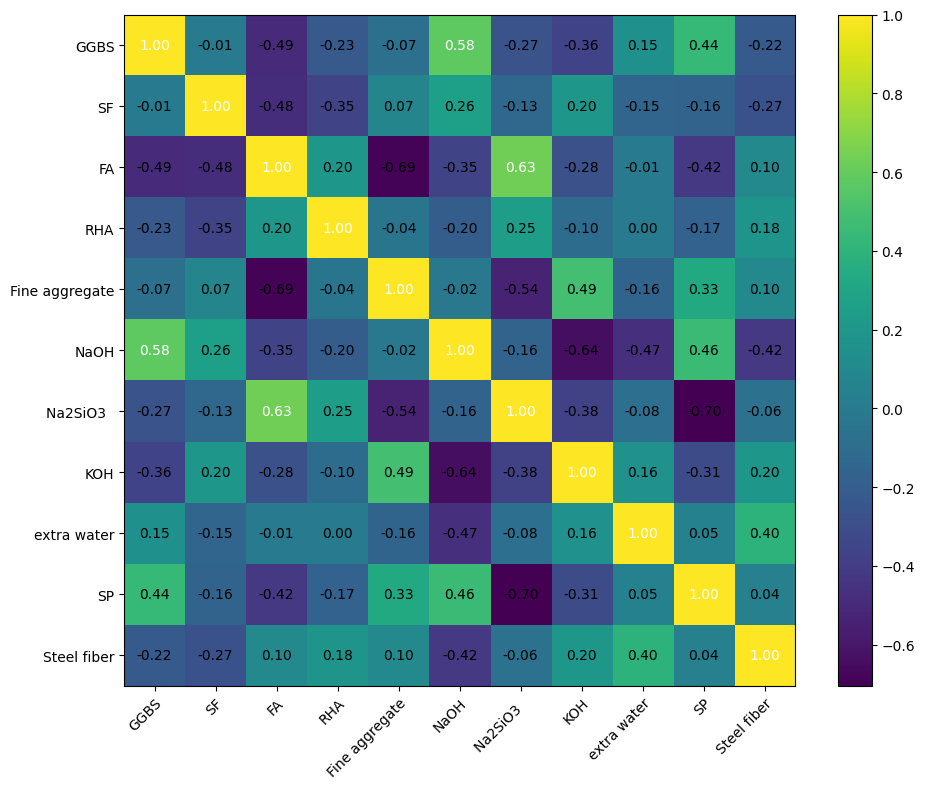

In [12]:
cm = data[cols].corr().fillna(0).values.T
hm = heatmap(cm, row_names=data[cols].columns, column_names=data[cols].columns, figsize=(10,8))
plt.tight_layout()
plt.savefig("/content/figures/heatmapofmaterials.png")

# Support Vector Regressor

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
from sklearn.metrics import r2_score

In [15]:
from tqdm.auto import tqdm

In [387]:
X = data.drop(columns="CS")
y = data["CS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [388]:
result_train = {
    "gamma": [],
    "C": [],
    "r2_score": []
}

result_test = {
    "gamma": [],
    "C": [],
    "r2_score": []
}

for gamma in tqdm(np.arange(0.1, 1.01, 0.01)):
    for C in range(1, 3001, 100):
        model = make_pipeline(
                SimpleImputer(),
                StandardScaler(),
                SVR(C=C, gamma=gamma, epsilon=0.1)
            )
        model.fit(X_train, y_train)
        result_train["gamma"].append(gamma)
        result_test["gamma"].append(gamma)
        result_train["C"].append(C)
        result_test["C"].append(C)
        result_train["r2_score"].append(r2_score(y_train, model.predict(X_train)))
        result_test["r2_score"].append(r2_score(y_test, model.predict(X_test)))

  0%|          | 0/91 [00:00<?, ?it/s]

In [389]:
result_train_df = pd.DataFrame(result_train).sort_values(by="r2_score", ascending=False).head(1000)
result_train_df

,gamma,C,r2_score
2729,1.00,2901,0.969215
2699,0.99,2901,0.969204
2669,0.98,2901,0.969189
2639,0.97,2901,0.969177
2728,1.00,2801,0.969176
...,...,...,...
1574,0.62,1401,0.966211
1544,0.61,1401,0.966206
1514,0.60,1401,0.966203
1279,0.52,1901,0.966203


In [390]:
result_test_df = pd.DataFrame(result_test).sort_values(by="r2_score", ascending=False).head(1000)
result_test_df

,gamma,C,r2_score
329,0.20,2901,0.774348
359,0.21,2901,0.774231
299,0.19,2901,0.774135
269,0.18,2901,0.773825
239,0.17,2901,0.773417
...,...,...,...
817,0.37,701,0.690889
1000,0.43,1001,0.690754
695,0.33,501,0.690745
1315,0.53,2501,0.690575


In [391]:
import plotly.graph_objects as go

X = result_train_df["C"]
Y = result_train_df["gamma"]
Z = result_train_df["r2_score"]

fig = go.Figure(
    data=go.Contour(
        x=X,
        y=Y,
        z=Z,
        colorscale="Viridis",
    )
)
fig.update_layout(width=800, height=600, xaxis_title="Parameter (C)", yaxis_title="Parameter (gamma)", title="SVR tuning (train set)")
fig.show()

In [392]:
X = result_test_df["C"]
Y = result_test_df["gamma"]
Z = result_test_df["r2_score"]

fig = go.Figure(
    data=go.Contour(
        x=X,
        y=Y,
        z=Z,
        colorscale="Viridis",
    )
)
fig.update_layout(width=800, height=600, xaxis_title="Parameter (C)", yaxis_title="Parameter (gamma)", title="SVR tuning (test set)")
fig.show()

In [361]:
from sklearn.ensemble import RandomForestRegressor

In [405]:
model = make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    SVR(C=1000, gamma=0.5, epsilon=1)
)

In [406]:
X = data.drop(columns="CS")
y = data["CS"]
r2_train = []
r2_test = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model.fit(X_train, y_train)
    r2_train.append(r2_score(y_train, model.predict(X_train)))
    r2_test.append(r2_score(y_test, model.predict(X_test)))

In [407]:
r2_train = np.array(r2_train)
r2_test = np.array(r2_test)

(array([ 1.,  7.,  8.,  6., 17., 14., 20., 11., 12.,  4.]),
 array([0.93348184, 0.93909899, 0.94471614, 0.9503333 , 0.95595045,
        0.96156761, 0.96718476, 0.97280192, 0.97841907, 0.98403622,
        0.98965338]),
 <BarContainer object of 10 artists>)

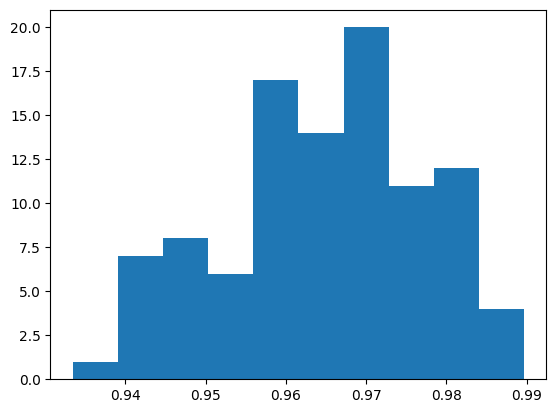

In [408]:
plt.hist(r2_train)

(array([ 1.,  1.,  0.,  1.,  6.,  3.,  9., 23., 31., 25.]),
 array([-0.37601811, -0.24847712, -0.12093613,  0.00660487,  0.13414586,
         0.26168685,  0.38922785,  0.51676884,  0.64430983,  0.77185083,
         0.89939182]),
 <BarContainer object of 10 artists>)

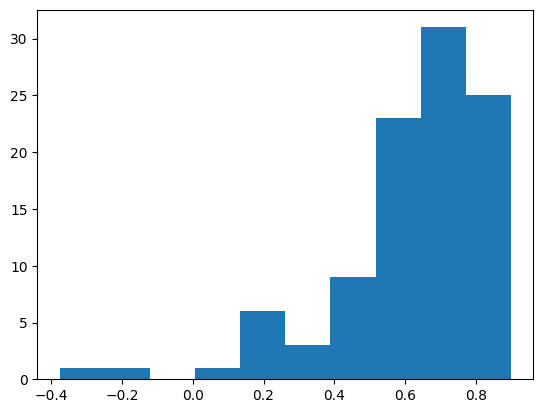

In [409]:
plt.hist(r2_test)

In [410]:
r2_train.mean(), r2_test.mean()

(0.9646748969794692, 0.6234709046871099)

In [412]:
reg_train = pd.DataFrame({"sample": np.arange(len(y_train)), "y_train": y_train, "y_pred": model.predict(X_train)})

In [415]:
reg_train

,sample,y_train,y_pred
121,0,142.0,141.000056
66,1,155.0,154.000090
93,2,100.0,101.000134
89,3,115.0,113.999857
35,4,100.0,100.999719
...,...,...,...
21,65,85.0,83.999706
41,66,100.0,100.999660
97,67,126.0,125.066443
96,68,157.0,155.999999


Text(0, 0.5, 'CS')

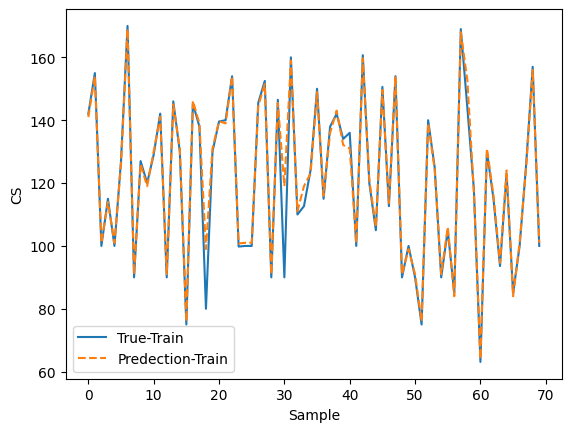

In [422]:
plt.plot(reg_train["sample"], reg_train["y_train"], label="True-Train")
plt.plot(reg_train["sample"], reg_train["y_pred"], label="Predection-Train", linestyle="dashed")
plt.legend()
plt.xlabel("Sample")
plt.ylabel("CS")

In [423]:
reg_test = pd.DataFrame({"sample": np.arange(len(y_test)), "y_test": y_test, "y_pred": model.predict(X_test)})

Text(0, 0.5, 'CS')

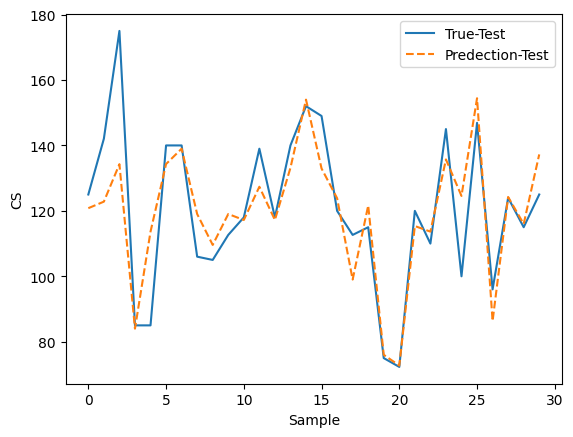

In [424]:
plt.plot(reg_test["sample"], reg_test["y_test"], label="True-Test")
plt.plot(reg_test["sample"], reg_test["y_pred"], label="Predection-Test", linestyle="dashed")
plt.legend()
plt.xlabel("Sample")
plt.ylabel("CS")

# Random Forest


In [443]:
model = make_pipeline(
    SimpleImputer(),
    RandomForestRegressor()
)

In [444]:
X = data.drop(columns="CS")
y = data["CS"]
r2_train = []
r2_test = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model.fit(X_train, y_train)
    r2_train.append(r2_score(y_train, model.predict(X_train)))
    r2_test.append(r2_score(y_test, model.predict(X_test)))

In [445]:
r2_train = np.array(r2_train)
r2_test = np.array(r2_test)

(array([ 5.,  5., 14., 21., 15., 15., 12.,  5.,  3.,  5.]),
 array([0.94034493, 0.94468187, 0.94901881, 0.95335574, 0.95769268,
        0.96202962, 0.96636656, 0.9707035 , 0.97504043, 0.97937737,
        0.98371431]),
 <BarContainer object of 10 artists>)

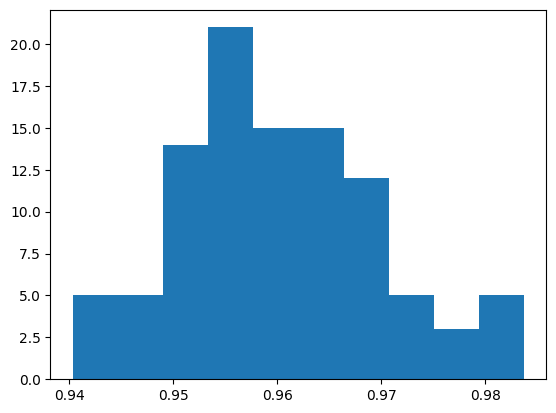

In [446]:
plt.hist(r2_train)

(array([ 1.,  0.,  2.,  1.,  1.,  9.,  8., 29., 31., 18.]),
 array([0.42112295, 0.47052915, 0.51993535, 0.56934154, 0.61874774,
        0.66815394, 0.71756014, 0.76696634, 0.81637254, 0.86577874,
        0.91518493]),
 <BarContainer object of 10 artists>)

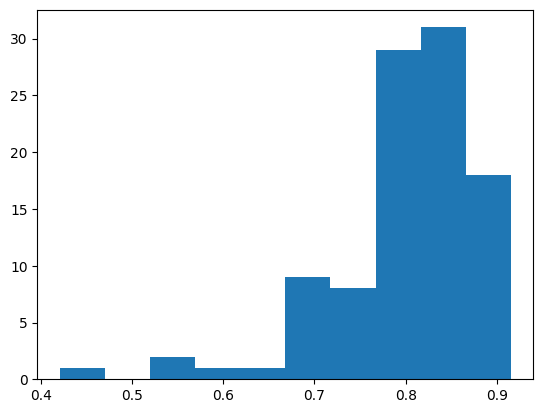

In [447]:
plt.hist(r2_test)

In [448]:
r2_train.mean(), r2_test.mean()

(0.9600657278537598, 0.7996846765701503)

In [449]:
reg_train = pd.DataFrame({"sample": np.arange(len(y_train)), "y_train": y_train, "y_pred": model.predict(X_train)})
reg_test = pd.DataFrame({"sample": np.arange(len(y_test)), "y_test": y_test, "y_pred": model.predict(X_test)})

Text(0, 0.5, 'CS')

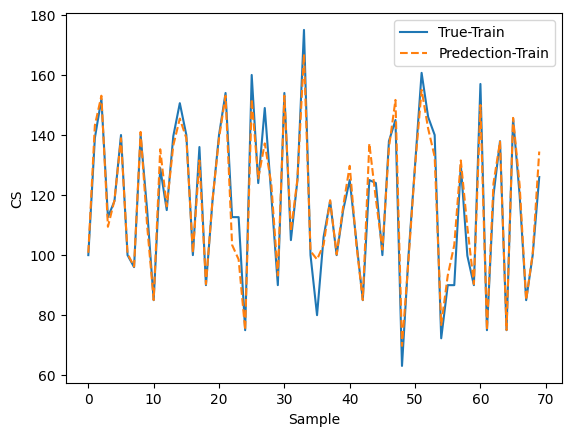

In [450]:
plt.plot(reg_train["sample"], reg_train["y_train"], label="True-Train")
plt.plot(reg_train["sample"], reg_train["y_pred"], label="Predection-Train", linestyle="dashed")
plt.legend()
plt.xlabel("Sample")
plt.ylabel("CS")

Text(0, 0.5, 'CS')

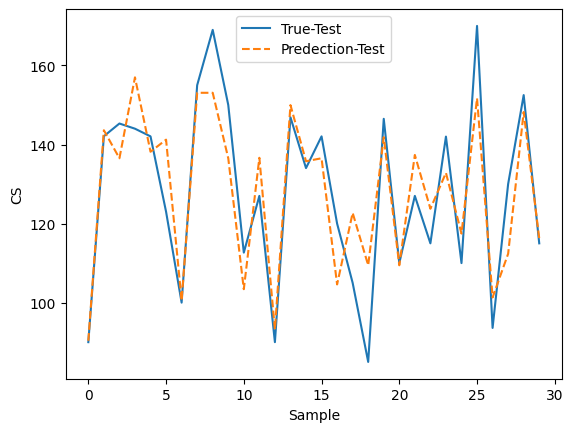

In [451]:
plt.plot(reg_test["sample"], reg_test["y_test"], label="True-Test")
plt.plot(reg_test["sample"], reg_test["y_pred"], label="Predection-Test", linestyle="dashed")
plt.legend()
plt.xlabel("Sample")
plt.ylabel("CS")

In [454]:
importances = model.named_steps["randomforestregressor"].feature_importances_

In [457]:
features_names = X.columns

<Axes: >

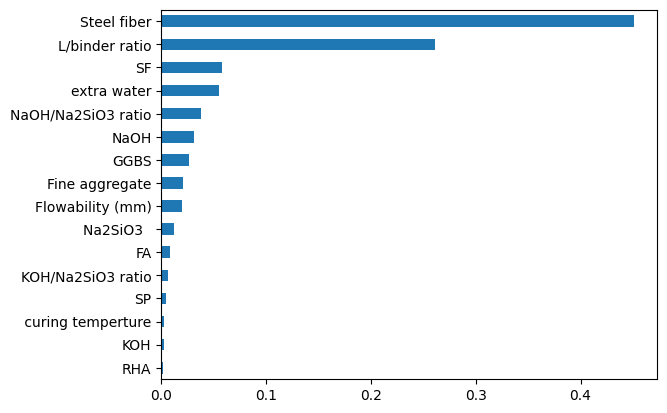

In [461]:
pd.Series(importances, index=features_names).sort_values().plot(kind="barh")